In [ ]:
!pip install wget

# K-nearest Neighbour

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

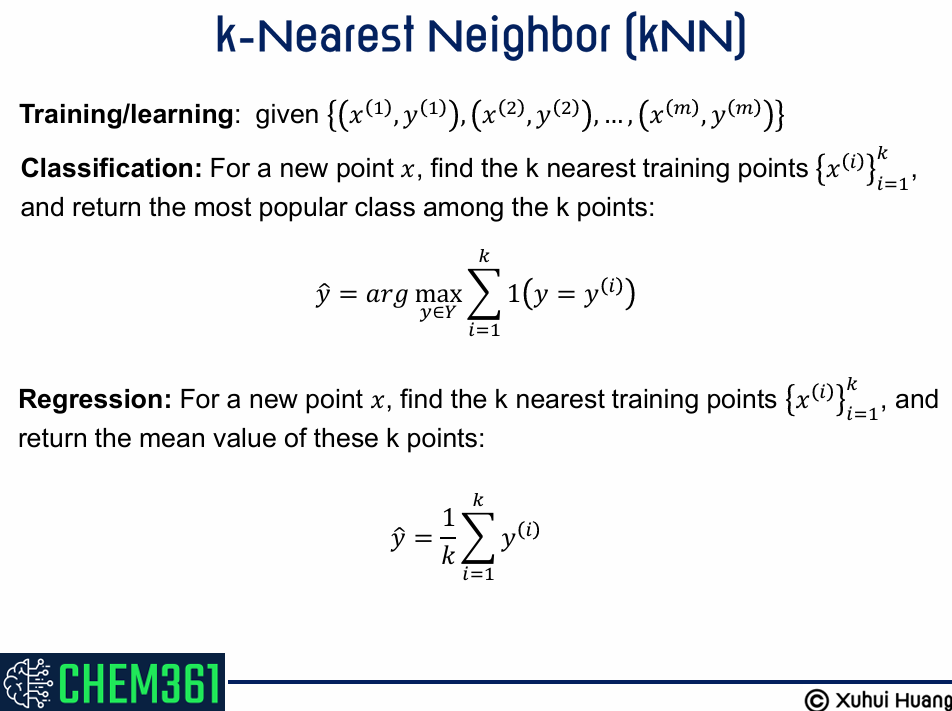

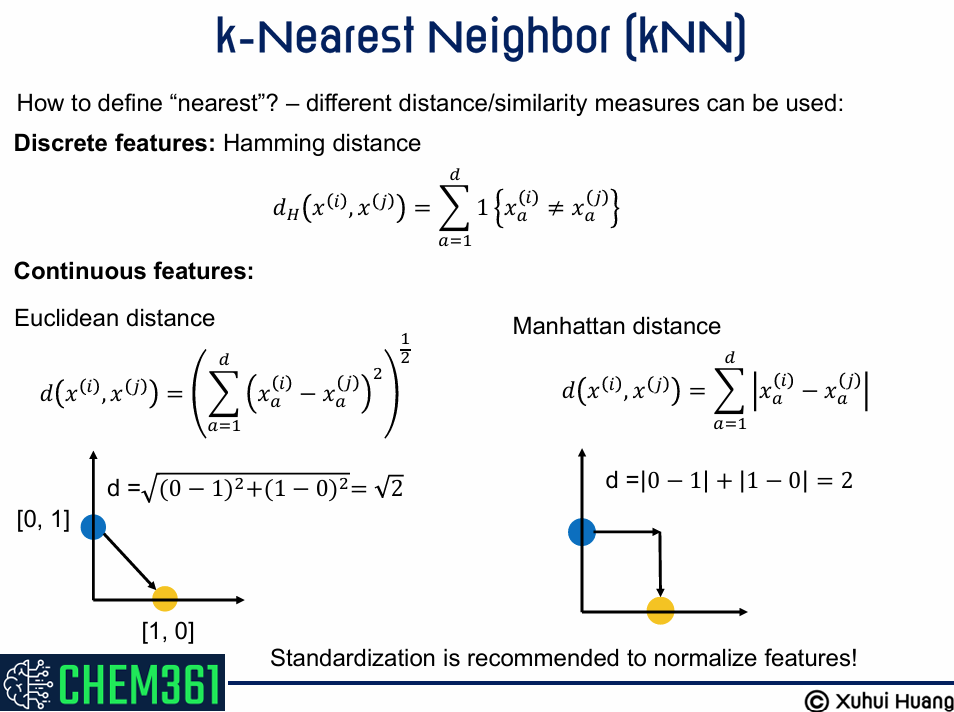

## Download Datasets

In [3]:
!python -m wget https://raw.githubusercontent.com/xuhuihuang/uwmadisonchem361/refs/heads/main/delaney_dataset_200compounds.csv \
--output delaney_dataset_200compounds.csv

!python -m wget https://raw.githubusercontent.com/xuhuihuang/uwmadisonchem361/refs/heads/main/delaney_dataset_40compounds.csv \
--output delaney_dataset_40compounds.csv

!python -m wget https://raw.githubusercontent.com/xuhuihuang/uwmadisonchem361/refs/heads/main/delaney_dataset_44compounds_with_outliers.csv \
--output delaney_dataset_44compounds_with_outliers.csv


Saved under delaney_dataset_200compounds.csv

Saved under delaney_dataset_40compounds.csv

Saved under delaney_dataset_44compounds_with_outliers.csv


### Load the curated Delaney dataset, which contains 40 compounds:
- 20 Soluble Compounds: Defined as those with a "measured log solubility in mols per litre" ≥ -2, labeled as 1.

- 20 Non-Soluble Compounds: Defined as those with a "measured log solubility in mols per litre" < -2, labeled as -1.

In [4]:
df = pd.read_csv('delaney_dataset_40compounds.csv')
df.head(2)

Molecular Weight  Polar Surface Area  \
0           103.124               23.79   
1           116.204               20.23   

   measured log solubility in mols per litre  solubility labels       smiles  
0                                      -1.00                  1  N#Cc1ccccc1  
1                                      -1.81                  1     CCCCCCCO

In [5]:
data = df.iloc[:].values

In [6]:
# data with log solubility and Polar Surface Are as features.
X = data[:,[2,1]]

# solubility labels
y = data[:,3].astype(int)

Text(0, 0.5, 'Polar Surface Area')

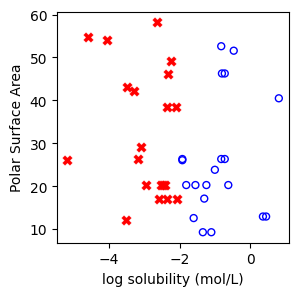

In [7]:
f, ax = plt.subplots(1,1,figsize=(3,3))

ax.scatter(X[np.where(y==1)[0],0],X[np.where(y==1)[0],1],s=25, marker='o', facecolors='none', edgecolor="blue", label='soluble')
ax.scatter(X[np.where(y==-1)[0],0],X[np.where(y==-1)[0],1],s=50, marker='X', color='red',linewidths=0.1, label='non-soluble')

ax.set_xlabel("log solubility (mol/L)")
ax.set_ylabel("Polar Surface Area")
#plt.legend()

### Let's fit a 1-NN model

In [8]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

### Visualize the predicted regions from 1-NN model.
##### In this visualization, the blue region indicates that the model predicts the points within this area as soluble and vice versa
##### As demonstrated, the performance of the 1-NN classifier is particularly sensitive to features that are either uncorrelated or unnormalized

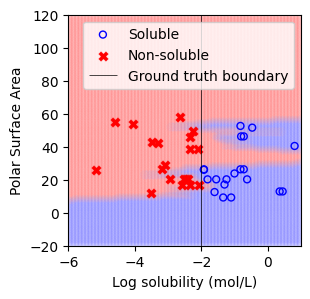

In [9]:
a = np.arange(-6,1.1,0.1)
b = np.arange(-20,121,1)
aa,bb = np.meshgrid(a,b)
X_grid = np.concatenate([aa.ravel().reshape(-1,1),bb.ravel().reshape(-1,1)],axis=1)
predict_labels = neigh.predict(X_grid)

from matplotlib.colors import ListedColormap

colors = ['red', 'blue']
cmap = ListedColormap(colors)

f, ax = plt.subplots(1,1,figsize=(3,3))
#plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
ax.scatter(x=X_grid[:,0], y=X_grid[:,1], c=predict_labels, cmap = cmap, alpha=0.025)

ax.scatter(X[np.where(y==1)[0],0],X[np.where(y==1)[0],1],s=25, marker='o', facecolors='none', edgecolor="blue", label='Soluble')
ax.scatter(X[np.where(y==-1)[0],0],X[np.where(y==-1)[0],1],s=50, marker='X', color='red',linewidths=0.1, label='Non-soluble')

ax.vlines(x=-2,ymin=-20,ymax=120,colors='black',linewidth=0.5,label='Ground truth boundary')

ax.set_xlabel("Log solubility (mol/L)")
ax.set_ylabel("Polar Surface Area")

ax.set_xlim(-6,1)
ax.set_ylim(-20,120)

plt.legend()